# 캐글 타이타닉 데이터셋 분석

EDA (탐색적 데이터 분석)를 할 때 데이터를 시각화하는 과정은 데이터를 이해하고, 패턴을 찾고, 가설을 세우는 데 매우 중요합니다. 일반적으로 EDA를 진행하면서 데이터를 시각화할 때 사용하는 대표적인 플롯과 그리는 순서를 아래에 정리해보았습니다.

### EDA에서 플롯 그리는 대표적인 순서

1. **데이터의 기본 통계 및 구조 확인**
   - **`df.head()`**, **`df.info()`**, **`df.describe()`**: 데이터의 기본적인 구조와 통계 요약을 확인합니다.
   - **히스토그램**: 각 변수의 분포를 확인하기 위해 사용합니다.
     ```python
     import seaborn as sns
     import matplotlib.pyplot as plt

     sns.histplot(df['column_name'])
     plt.show()
     ```

2. **범주형 변수의 분포 확인**
   - **막대 그래프 (Bar Plot)**: 각 범주형 변수의 빈도를 시각화합니다.
     ```python
     sns.countplot(x='categorical_column', data=df)
     plt.show()
     ```
   - **파이 차트**: 범주형 변수의 비율을 시각화할 때 유용합니다.
     ```python
     df['categorical_column'].value_counts().plot.pie(autopct='%1.1f%%')
     plt.show()
     ```
   - **cat 플롯 (cat Plot)**: 범주형 변수들을 x,y와 hue로 묶어서 교차관계를 확인하기에 좋더라

    '''python
    sns.catplot(x = '범주형' ,  y = '범주형'. hue = '범주형 ')
    '''

3. **연속형 변수의 분포 확인**
   - **히스토그램**: 연속형 변수의 분포를 시각화합니다.
     ```python
     sns.histplot(df['continuous_column'])
     plt.show()
     ```
   - **상자 그림 (Box Plot)**: 데이터의 중앙값, 사분위수, 이상치를 시각화합니다.
     ```python
     sns.boxplot(x='categorical_column', y='continuous_column', data=df)
     plt.show()
     ```

4. **변수 간의 관계 시각화**
   - **산점도 (Scatter Plot)**: 두 연속형 변수 간의 관계를 시각화합니다.
     ```python
     sns.scatterplot(x='continuous_column1', y='continuous_column2', data=df)
     plt.show()
     ```
   - **페어 플롯 (Pair Plot)**: 연속형 변수 간의 쌍별 관계를 시각화합니다.
     ```python
     sns.pairplot(df[['col1', 'col2', 'col3']])
     plt.show()
     ```

5. **범주형 변수와 연속형 변수의 관계 시각화**
   - **상자 그림 (Box Plot)**: 범주형 변수와 연속형 변수 간의 관계를 시각화합니다.
     ```python
     sns.boxplot(x='categorical_column', y='continuous_column', data=df)
     plt.show()
     ```
   - **바이올린 플롯 (Violin Plot)**: 상자 그림과 밀도 곡선을 결합하여 범주형 변수와 연속형 변수 간의 관계를 시각화합니다.
     ```python
     sns.violinplot(x='categorical_column', y='continuous_column', data=df)
     plt.show()
     ```

6. **상관 관계 분석**
   - **상관 행렬 히트맵 (Heatmap)**: 연속형 변수 간의 상관 관계를 시각화합니다.
     ```python
     import seaborn as sns
     import matplotlib.pyplot as plt

     corr = df.corr()
     sns.heatmap(corr, annot=True, cmap='coolwarm')
     plt.show()
     ```

7. **추가적인 시각화**
   - **리니어 리그레션 플롯 (Regression Plot)**: 두 연속형 변수 간의 관계와 추세선을 시각화합니다.
     ```python
     sns.regplot(x='continuous_column1', y='continuous_column2', data=df)
     plt.show()
     ```
   - **선 그래프 (Line Plot)**: 시간에 따른 변화 추세를 시각화할 때 유용합니다.
     ```python
     sns.lineplot(x='time_column', y='value_column', data=df)
     plt.show()
     ```

### EDA 시 주의할 점

1. **데이터 전처리**: EDA를 진행하기 전에 결측값, 이상치 등을 처리해야 합니다.
2. **변수의 타입**: 연속형과 범주형 변수의 구분에 따라 적절한 플롯을 선택해야 합니다.
3. **시각화의 목적**: 데이터를 이해하고 인사이트를 얻기 위한 목적에 따라 적절한 플롯을 선택해야 합니다.

이러한 순서와 방법을 통해 데이터를 시각적으로 탐색하고 이해할 수 있으며, 데이터 분석의 기초를 다질 수 있습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')

In [2]:
df = pd.read_csv('./dataset/train.csv')
# df는 train dataset
df_test = pd.read_csv('./dataset/test.csv')

In [3]:
print(df.shape)
print(df_test.shape)

(891, 12)
(418, 11)


+ PassengerId      : 승객 아이디
+ Survived         : 사망 0, 생존 1
+ Pclass           : 1,2,3 등석
+ Name             : 이름
+ Sex              : 성별 남자 0, 여자 1
+ Age              : 나이
+ SibSp            : 동승한 자매/배우자의 수
+ Parch            : 동승한 부모 자식의 수
+ Ticket           : 티켓 번호
+ Fare             : 요금
+ Cabin            : 방 호수
+ Embarked         : 탑승지 c = 셰르부르, q= 퀸즈타운, s= 사우샘프턴

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

+ 각 변수의 결측치 비율

In [7]:
for c in df.columns:
    print(f'{c:<14} : {df[c].isnull().sum() / len(df[c]): .2f} %')

PassengerId    :  0.00 %
Survived       :  0.00 %
Pclass         :  0.00 %
Name           :  0.00 %
Sex            :  0.00 %
Age            :  0.20 %
SibSp          :  0.00 %
Parch          :  0.00 %
Ticket         :  0.00 %
Fare           :  0.00 %
Cabin          :  0.77 %
Embarked       :  0.00 %


# 성별 인코딩

In [8]:
s = {
    'male': 0 , 
    'female' : 1
}
df['Sex'] = df['Sex'].map(s)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


+ 생존자 비율 : 38%
+ 평균 나이   : 29.7세
+ 성별        : 여성 35%, 남성 65%

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


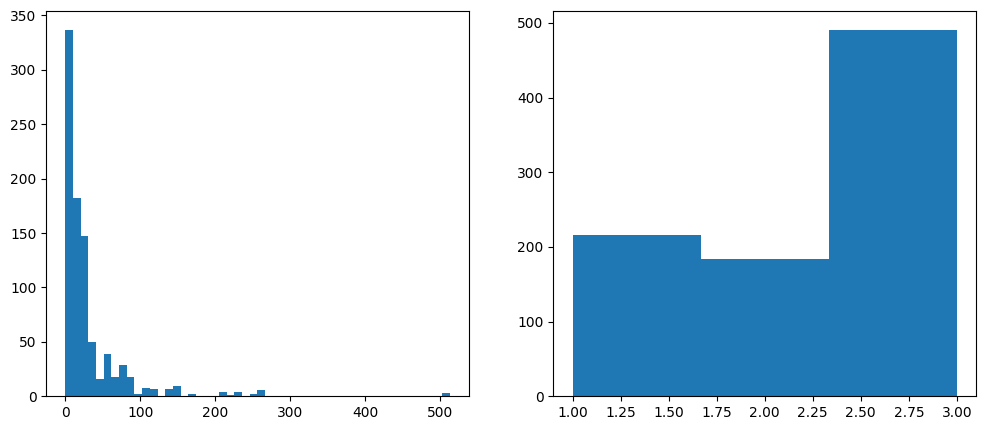

-0.5494996199439082

In [10]:
fig,axes = plt.subplots(1,2,figsize = (12,5))
axes[0].hist(df['Fare'],bins = 50);
axes[1].hist(df['Pclass'],bins = 3);
plt.show()
df['Fare'].corr(
df['Pclass']
)


<Axes: >

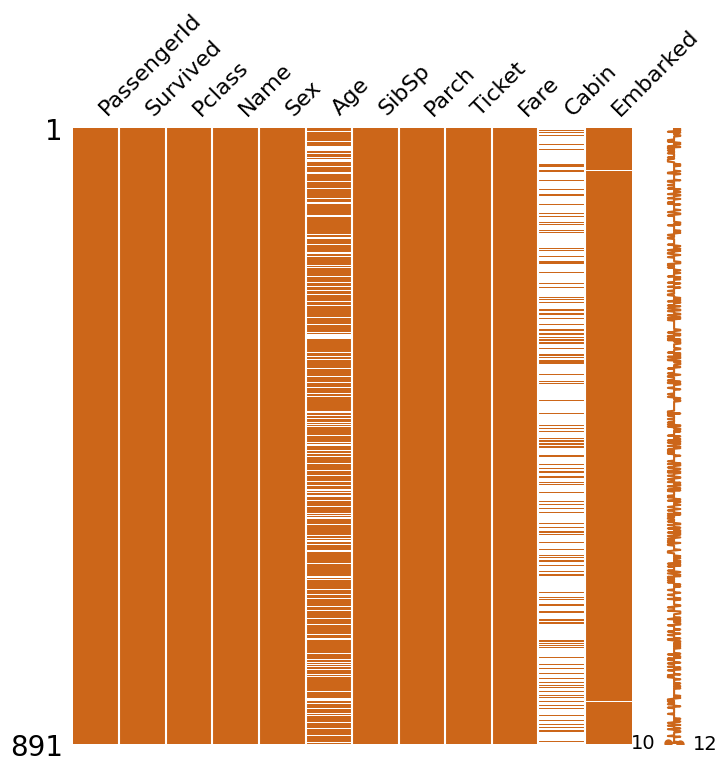

In [11]:
msno.matrix(df, figsize = (8,8), color= (0.8,0.4,0.1))

# 생존자 비율

<BarContainer object of 2 artists>

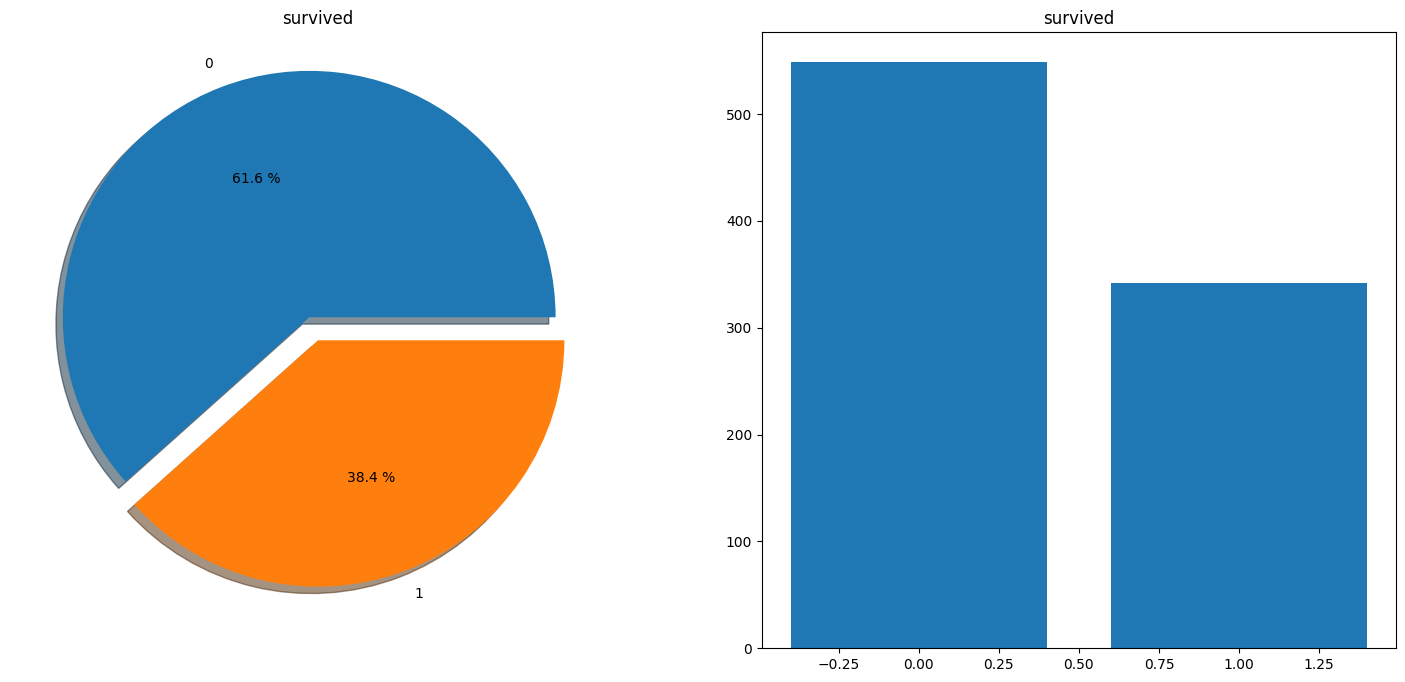

In [12]:
f, axes = plt.subplots(1,2,figsize = (18,8))
axes[0].pie(df['Survived'].value_counts(),labels = ['0', '1'],shadow = True,explode = [0.1,0] ,autopct='%1.1f %%');
axes[0].set_title('survived')
axes[1].set_title('survived')
axes[1].bar(df['Survived'].value_counts().index,df['Survived'].value_counts())

# Pclass -  좋은 자리일 수록 생존률 증가

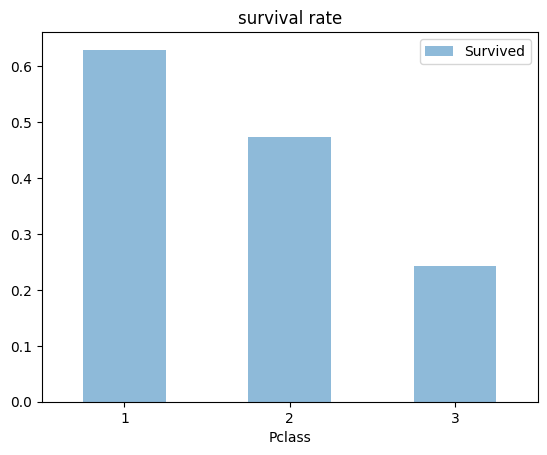

In [13]:
m = df[['Survived',"Pclass"]].groupby(['Pclass']).mean()
m.plot.bar(alpha = 0.5)
plt.xticks(rotation=0);
plt.title('survival rate');

<Axes: xlabel='Pclass', ylabel='count'>

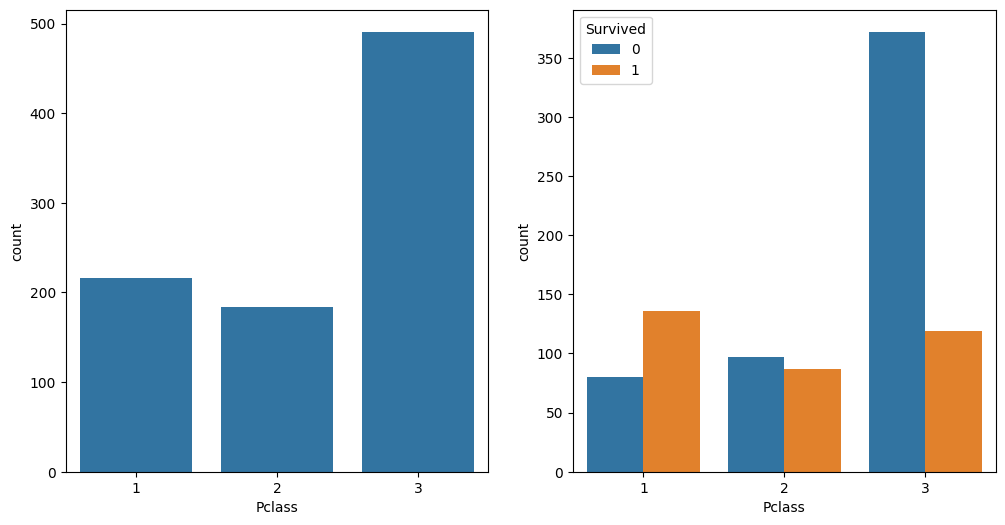

In [14]:
f,a = plt.subplots(1,2,figsize = (12,6))

#m = df.groupby(['Pclass', 'Survived']).size().unstack()
sns.countplot(df,x= 'Pclass', ax = a[0])
#df['Pclass'].value_counts().plot.bar(ax = a[0])
sns.countplot(x='Pclass',hue = 'Survived', data = df,ax = a[1])

<Axes: xlabel='Pclass'>

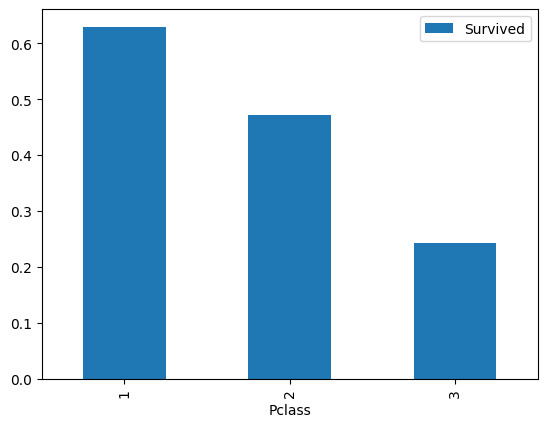

In [15]:
df[['Survived','Pclass']].groupby('Pclass').mean().plot.bar()

In [16]:
df[['Survived','Pclass']].groupby(['Pclass']).size()

Pclass
1    216
2    184
3    491
dtype: int64

In [17]:
plt.rcParams['font.family'] = 'Malgun Gothic'

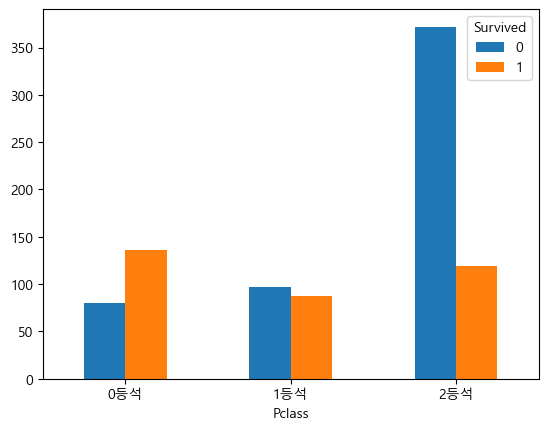

In [18]:
a = df.groupby(['Pclass','Survived']).size().unstack().plot.bar()

plt.xticks(a.get_xticks(),map(lambda x : str(x) + '등석',a.get_xticks()), rotation = 0);


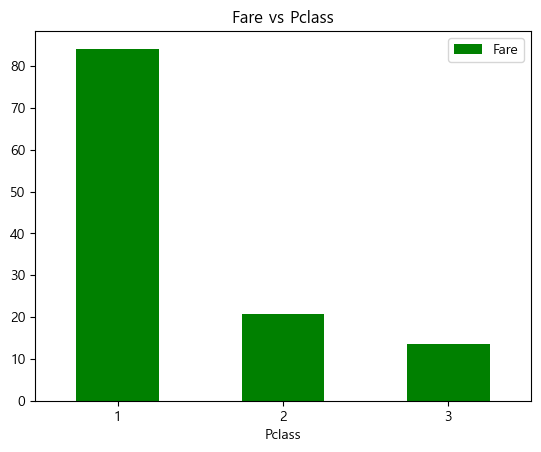

In [19]:
df[['Pclass','Fare']].groupby('Pclass').mean().plot.bar(color = 'g').set_xticklabels([1,2,3],rotation = 0)
plt.title('Fare vs Pclass');

# 성별 - 여성보다 남성이 많고 그 중 남성 사망자가 더 많음

C:\Users\yunji\AppData\Local\Temp\ipykernel_14548\2279404100.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['남자0','여자1'],rotation = 0);


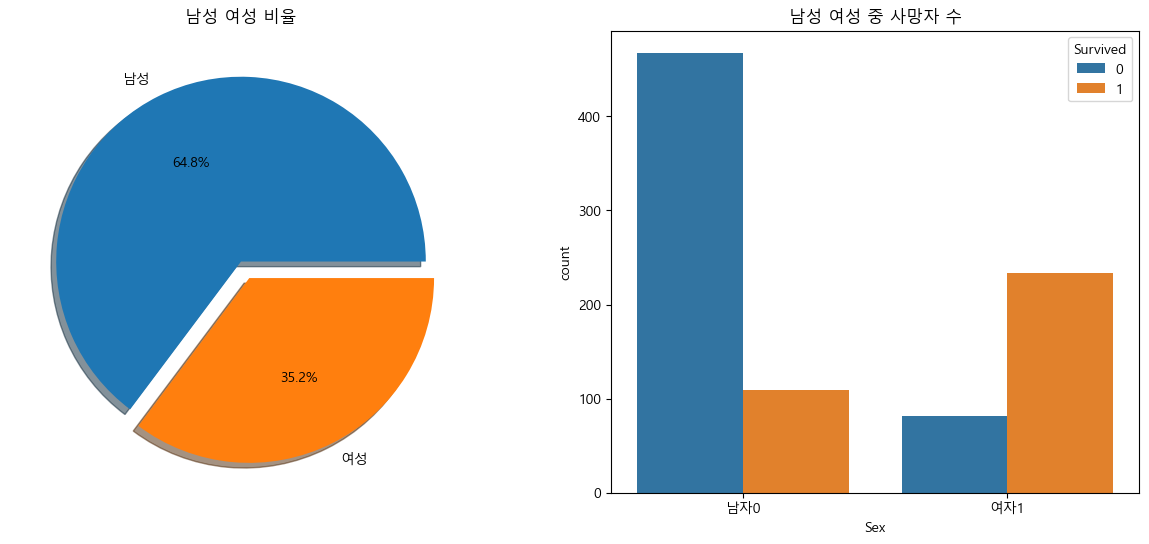

In [20]:
f,ax = plt.subplots(1,2,figsize = (15,6));
df['Sex'].value_counts().plot.pie(autopct = '%.1f%%',ax = ax[0],labels = ['남성','여성'],explode = [0,0.1],shadow = True);
ax[0].set_title('남성 여성 비율');
ax[0].set_ylabel('');
sns.countplot(df,x= 'Sex',hue = 'Survived',ax = ax[1]);
ax[1].set_xticklabels(['남자0','여자1'],rotation = 0);
ax[1].set_title('남성 여성 중 사망자 수');


<Axes: xlabel='Sex'>

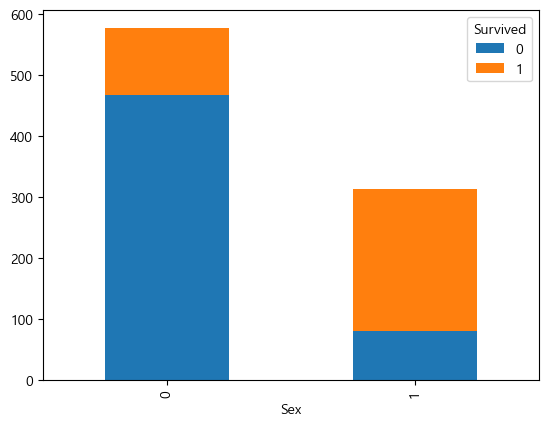

In [21]:
pd.crosstab(df['Sex'],df['Survived']).plot.bar(stacked = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [23]:
#sns.pairplot(df[['Pclass','Age','SibSp','Parch','Fare']],diag_kind = 'hist',kind='reg')

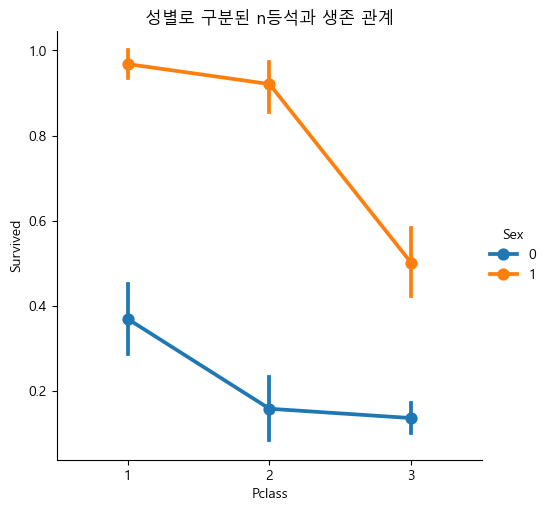

In [24]:
sns.catplot(x='Pclass',y = 'Survived', hue = 'Sex', data=df, kind = 'point')
# ax매개변수 불가
plt.title("성별로 구분된 n등석과 생존 관계");

# Age - # 나이가 적을수록 생존자가 많다.

In [25]:
print(f'가장 높은 나이: {df['Age'].max()}')
print(f'가장 낮은 나이: {df['Age'].min()}')
print(f'탑승객 평균 나이: {df['Age'].mean()}')

가장 높은 나이: 80.0
가장 낮은 나이: 0.42
탑승객 평균 나이: 29.69911764705882


In [26]:
print('결측치 비율 :',df['Age'].isnull().sum()/len(df['Age']))

결측치 비율 : 0.19865319865319866


In [27]:
df[df['Survived'] == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

c:\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


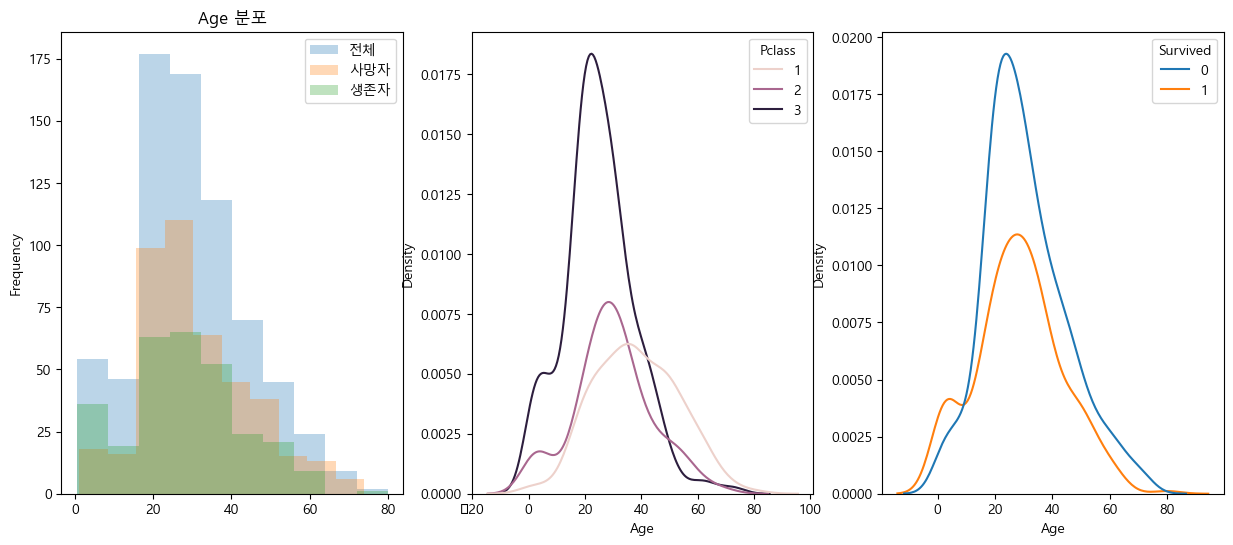

In [28]:
f,a =  plt.subplots(1,3,figsize = (15,6))
df['Age'].plot.hist(bins = 10,ax = a[0],alpha = 0.3,label = '전체')
a[0].set_title('Age 분포')
a[0].hist(df[df['Survived'] == 0]['Age'],alpha = 0.3,label = '사망자')
a[0].hist(df[df['Survived'] == 1]['Age'],alpha = 0.3,label = '생존자')
a[0].legend()

sns.kdeplot(df,x = 'Age',ax = a[1],hue = 'Pclass')
sns.kdeplot(df,x= 'Age',ax = a[2],hue = 'Survived')



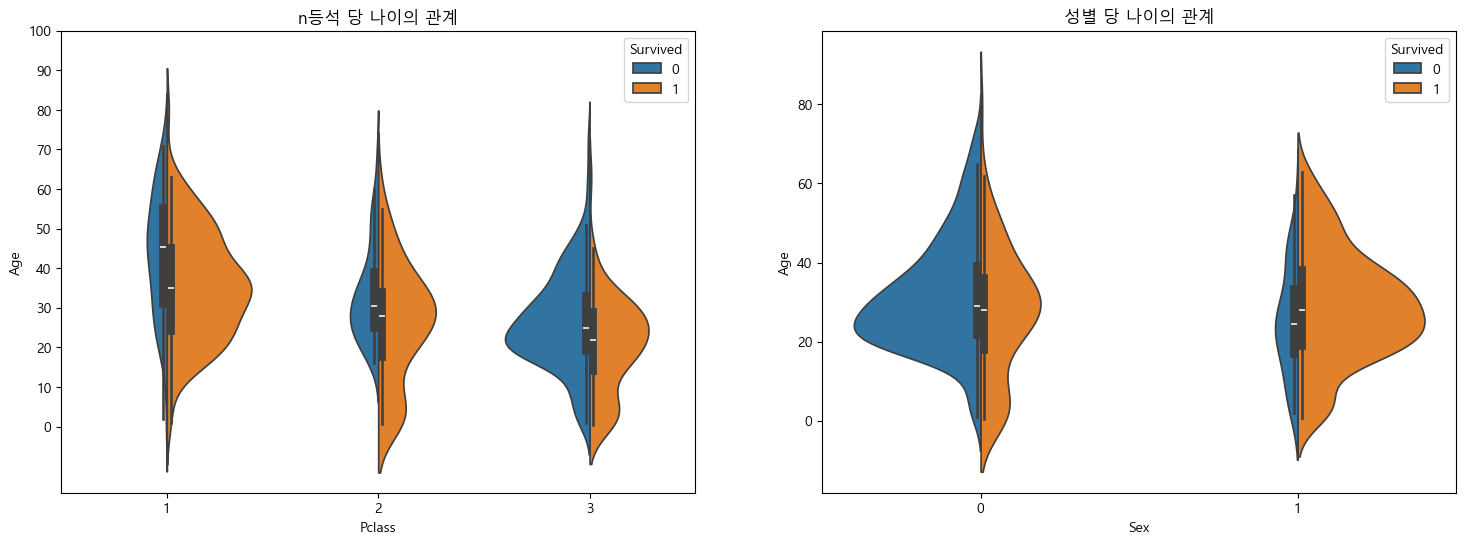

In [29]:
f,a = plt.subplots(1,2,figsize = (18,6))
sns.violinplot(df, x = 'Pclass', y = 'Age' ,hue = 'Survived',split= True ,ax = a[0],density_norm= 'count')
a[0].set_yticks(range(0,110,10))

sns.violinplot(df,x = 'Sex', y = 'Age' , ax = a[1], hue = 'Survived',split = True,density_norm= 'count')
a[0].set_yticks(range(0,110,10));
a[0].set_title("n등석 당 나이의 관계")
a[1].set_title("성별 당 나이의 관계");

# Embarked - C 탑승지가 제일 사망률이 높다.

Axes(0.125,0.153088;0.227941x0.683824)
Axes(0.398529,0.11;0.227941x0.77)
Axes(0.672059,0.11;0.227941x0.77)


C:\Users\yunji\AppData\Local\Temp\ipykernel_14548\2316690237.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[1].set_xticklabels(list('CQS'),rotation = 0)


Text(0.5, 1.0, '탑승지 당 생존자 비율')

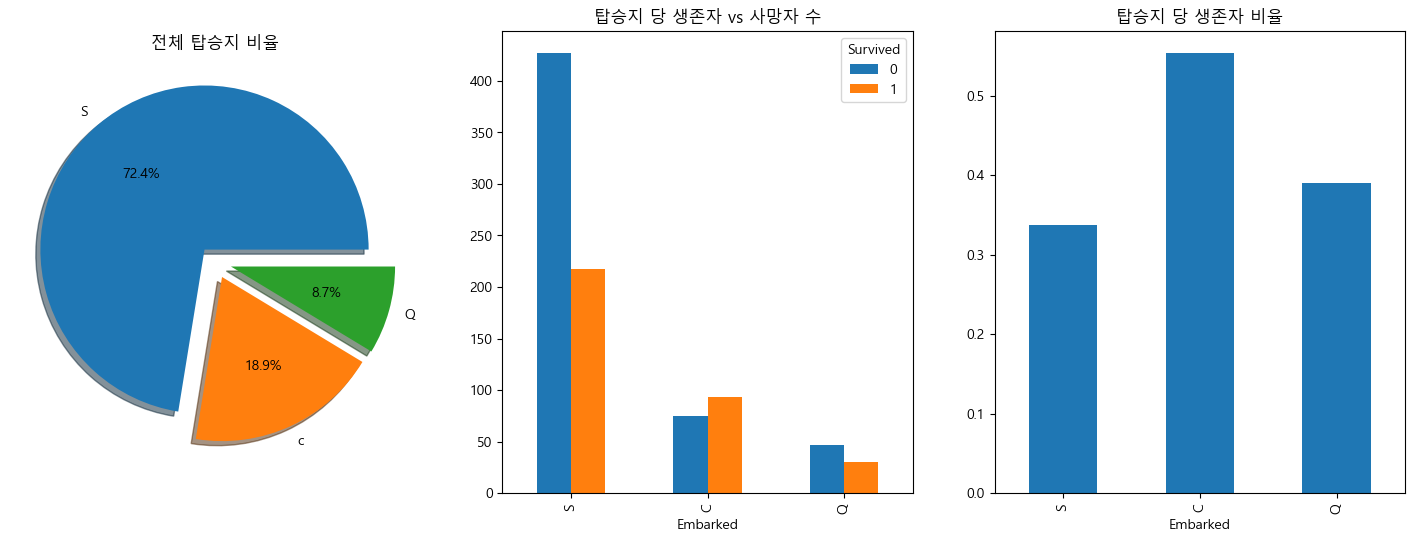

In [30]:
f,a = plt.subplots(1,3,figsize= (18,6))
e = df['Embarked'].value_counts()
a[0].pie(e,autopct ='%.1f%%',labels= ['S','c','Q'],explode = [0.1,0.1,0.1],shadow = True)
a[1].set_xticklabels(list('CQS'),rotation = 0)
(df[df['Survived'] == 1]['Embarked'].value_counts()/df['Embarked'].value_counts()).plot.bar(ax = a[2])
df[['Embarked','Survived']].groupby(['Embarked','Survived'],).size().unstack().loc[['S','C','Q']].plot.bar(ax=  a[1])
for x in f.axes:
    print(x)

a[0].set_title('전체 탑승지 비율')
a[1].set_title('탑승지 당 생존자 vs 사망자 수')
a[2].set_title('탑승지 당 생존자 비율')


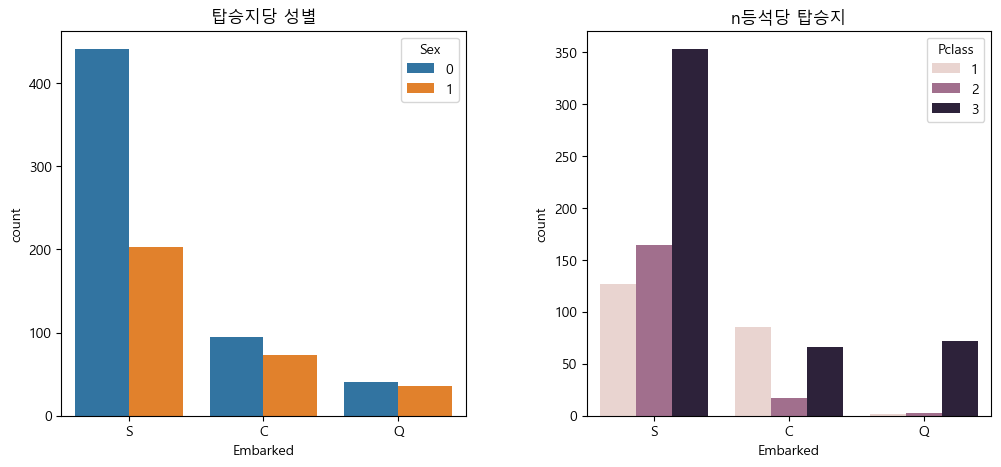

In [31]:
f,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(data = df, x = 'Embarked', hue = 'Sex',ax = ax[0])
sns.countplot(data = df, x = 'Embarked', hue = 'Pclass',ax = ax[1])
ax[0].set_title('탑승지당 성별')
ax[1].set_title('n등석당 탑승지')
f.subplots_adjust(wspace= 0.3)

# FamillySize = SibSp + Parch - 다인가족 사망률 100%, 4,3,2명인 가족 최대 생존률

In [32]:
# 본인까지 더하기
df['FamillySize'] = df['SibSp'] + df['Parch'] + 1

In [33]:
df['FamillySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamillySize, dtype: float64

In [34]:
1 - df[['FamillySize','Survived']].groupby('FamillySize').mean()

,Survived
FamillySize,
1,0.696462
2,0.447205
3,0.421569
4,0.275862
5,0.800000
6,0.863636
7,0.666667
8,1.000000
11,1.000000


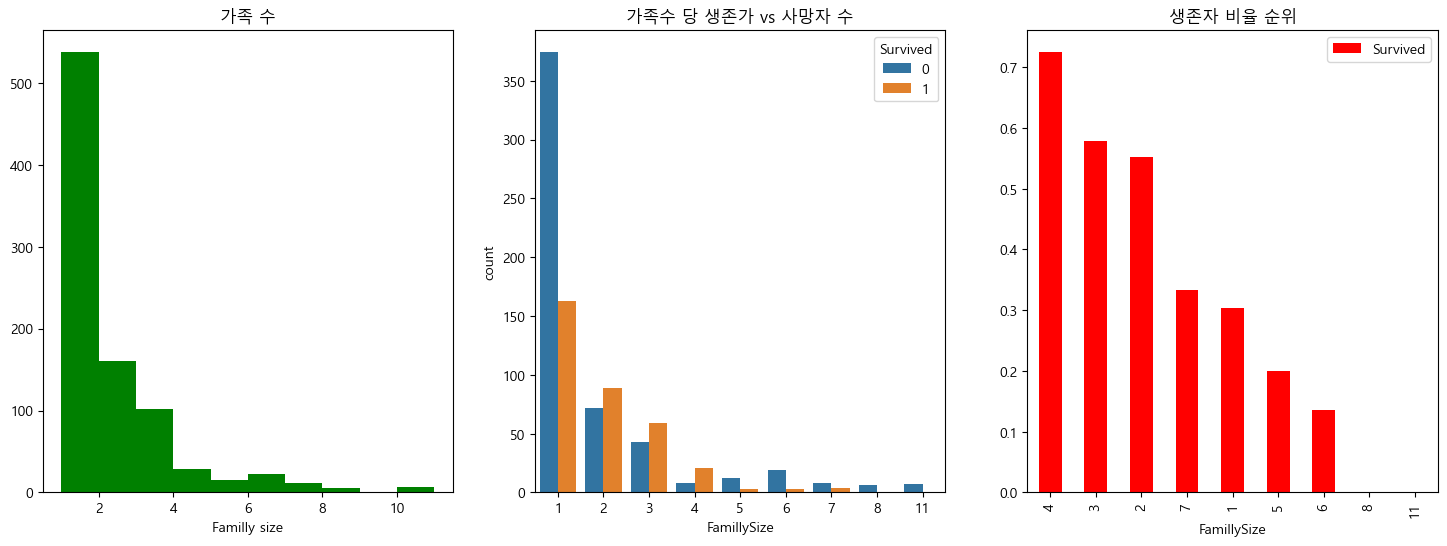

In [35]:
f,ax =  plt.subplots(1,3,figsize = (18,6))

ax[0].hist(df['FamillySize'],color = 'g');
ax[0].set_title('가족 수')
ax[0].set_xlabel('Familly size')

sns.countplot(data = df , x = 'FamillySize', hue = 'Survived', ax = ax[1])
df[['FamillySize','Survived']].groupby('FamillySize').mean().sort_values(ascending= False , by = 'Survived').plot.bar( color = 'red', ax = ax[2])
ax[1].set_title('가족수 당 생존가 vs 사망자 수');
ax[2].set_title('생존자 비율 순위');


In [36]:
df[['FamillySize','Survived']][df['Survived'] == 1].groupby('FamillySize').size()

FamillySize
1    163
2     89
3     59
4     21
5      3
6      3
7      4
dtype: int64

In [37]:
df[['FamillySize','Survived']].groupby('FamillySize').size()

FamillySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
dtype: int64

# Fare, Cabin, Ticket

In [38]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Pclass', ylabel='Fare'>

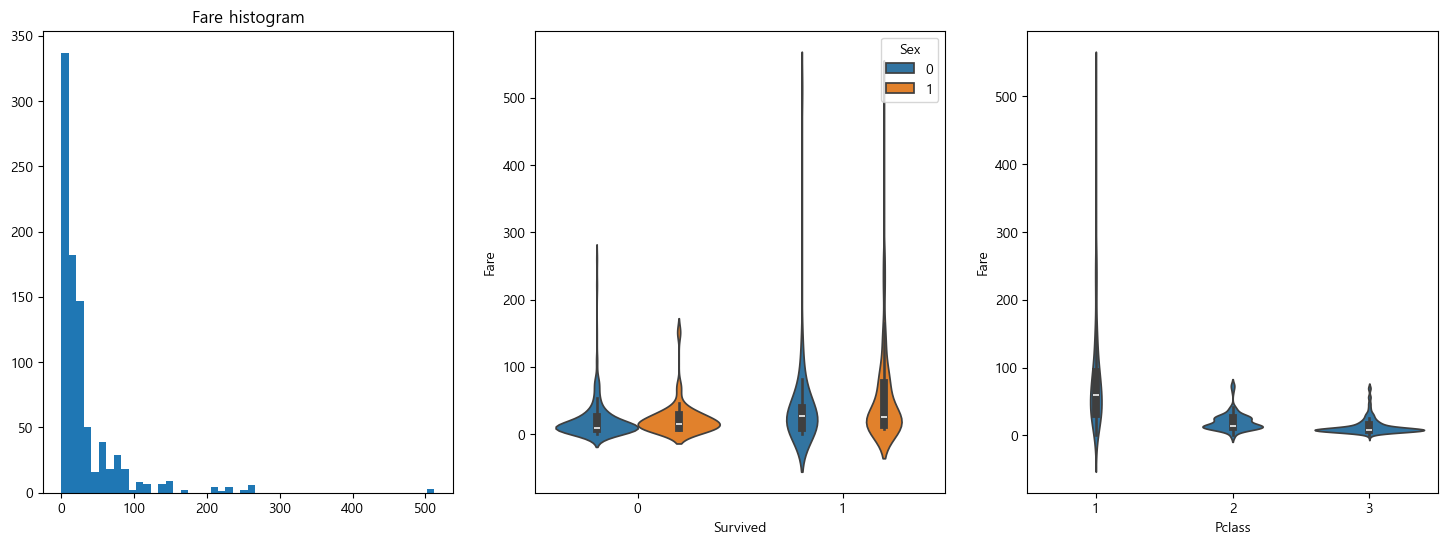

In [39]:
f,a = plt.subplots(1,3,figsize = (18,6))
a[0].hist(df['Fare'],bins = 50 );
a[0].set_title('Fare histogram')

sns.violinplot(data = df, x = 'Survived', y = 'Fare' ,hue = 'Sex', ax = a[1] )
sns.violinplot(data = df, x = 'Pclass', y = 'Fare' , ax = a[2] )
sns.boxplot()

In [40]:

df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [41]:
df['Cabin'] = df['Cabin'].str[:1]
df_test['Cabin'] = df_test['Cabin'].str[:1]

In [42]:
df.loc[df['Cabin'].isnull(),'Cabin'] = 'N'
df_test.loc[df_test['Cabin'].isnull(),'Cabin'] = 'N'

In [43]:
df['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

# Cabin에서 결측치는 많지만, 결측치에 속하면 생존률이 낮음

<Axes: xlabel='Cabin'>

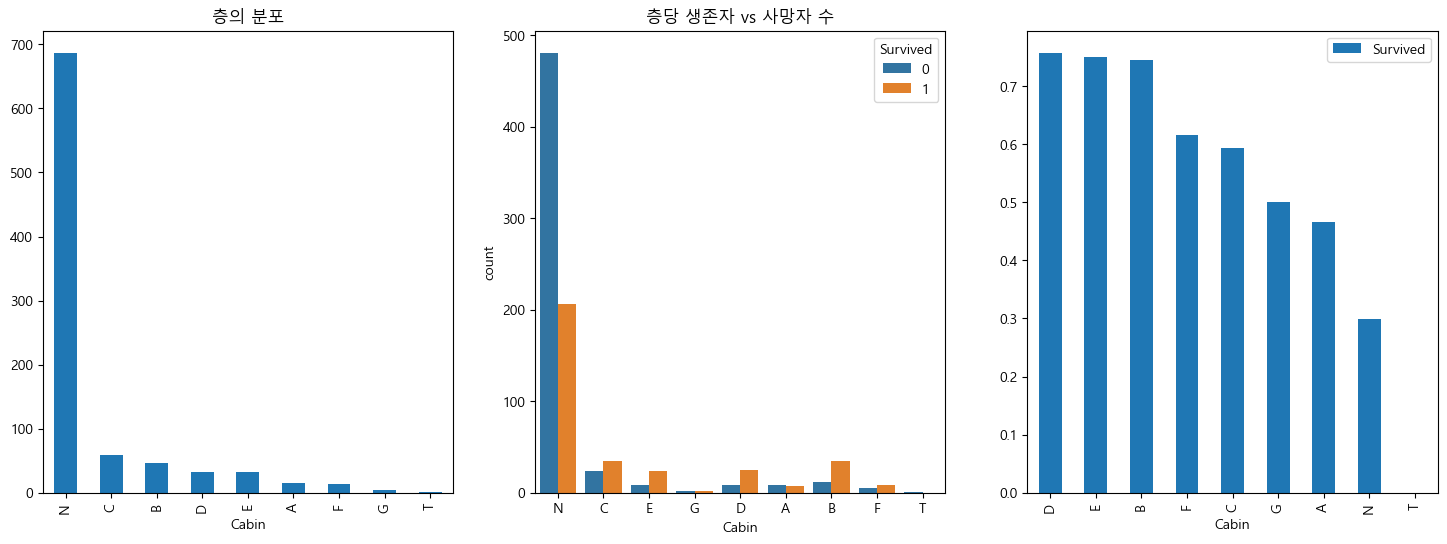

In [44]:
f,a = plt.subplots(1,3,figsize = (18,6))
df['Cabin'].value_counts().plot.bar( ax = a[0])
a[0].set_title('층의 분포')
sns.countplot(data = df, x = 'Cabin',hue = 'Survived', ax = a[1])
a[1].set_title('층당 생존자 vs 사망자 수')
df[['Cabin','Survived']].groupby('Cabin').mean().sort_values('Survived',ascending= False).plot.bar(ax = a[2])


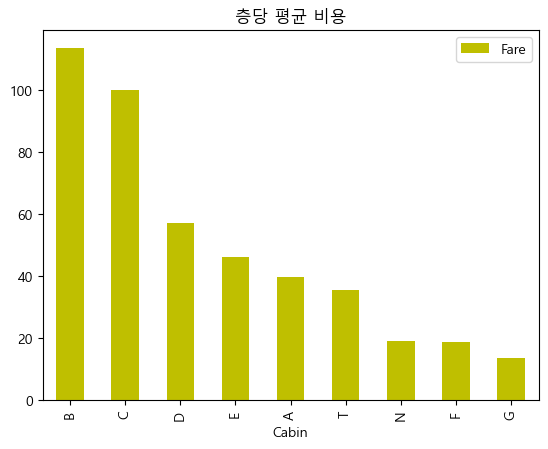

In [45]:
df[['Fare', 'Cabin']].groupby('Cabin').mean().sort_values('Fare',ascending= False).plot.bar(color = 'y')
plt.title('층당 평균 비용');

# Feature engineering

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamillySize  891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


# test set 변경

In [47]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

In [48]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

<Axes: >

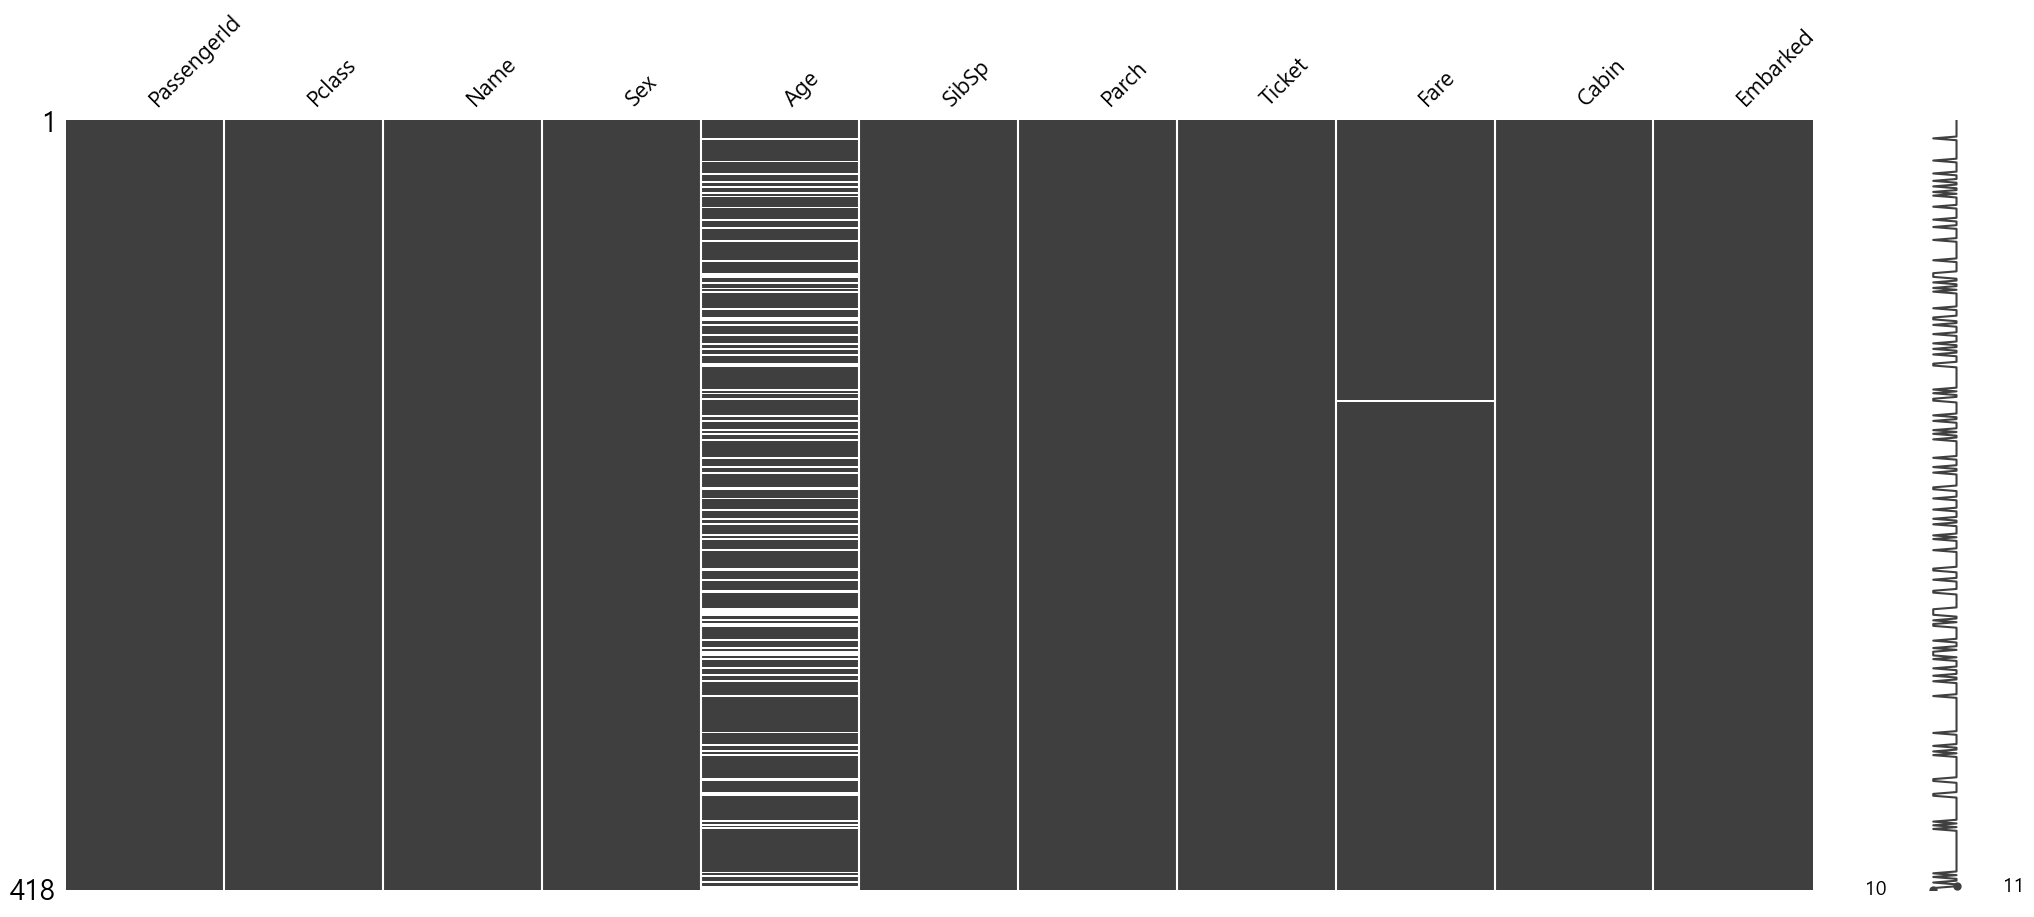

In [49]:
msno.matrix(df_test)

In [50]:
df_test = df_test.dropna(subset= 'Fare')

In [51]:
df['Initial'] = df['Name'].str.extract(r'(\w+)[.]')
df_test['Initial'] = df_test['Name'].str.extract(r'(\w+)[.]')

In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
FamillySize      0
Initial          0
dtype: int64

In [53]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Initial         0
dtype: int64

In [54]:
df_test['FamillySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [55]:
df.drop(['PassengerId', 'SibSp', 'Parch', 'Name'], axis=1, inplace=True)

In [56]:
df_test.drop(['PassengerId', 'SibSp', 'Parch','Name'], axis=1, inplace=True)

In [57]:
s1 = set(df_test.columns)
s2 = set(df.columns)
s1 ^ s2

{'Survived'}

# Age는 약 20%가 결측치 -> 이름을 통해 평균대치

In [58]:
pd.set_option('display.max_rows', None)
# p = re.compile("(Mr.|Miss.|Mrs.|Ms.)")
# def nameExtractor(name):
#     if p.search(name):
#         return p.search(name).group()
#     else:
#         return name

df['Initial'].value_counts()

Initial
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [59]:
pd.crosstab(df['Initial'],df['Sex']).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
1,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0


In [60]:
df_test['Initial'].value_counts()

Initial
Mr        239
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [61]:
d = {
    'Capt' : 'Mr',
    'Col': 'Mr',
    'Countess': 'Mrs',
    "Don": "Mr",
    "Dr": "Other",
    "Major": "Mr",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Rev": "Mr",
    'Sir': "Mr",
    'Ms' : "Miss",
    "Jonkheer": "Mr",
    "Lady":"Mrs",
    "Dona": "Mrs"
        }
df['Initial'] = df['Initial'].replace(d)
df_test['Initial'] = df_test['Initial'].replace(d)

In [62]:
df['Initial'].value_counts()

Initial
Mr        531
Miss      185
Mrs       128
Master     40
Other       7
Name: count, dtype: int64

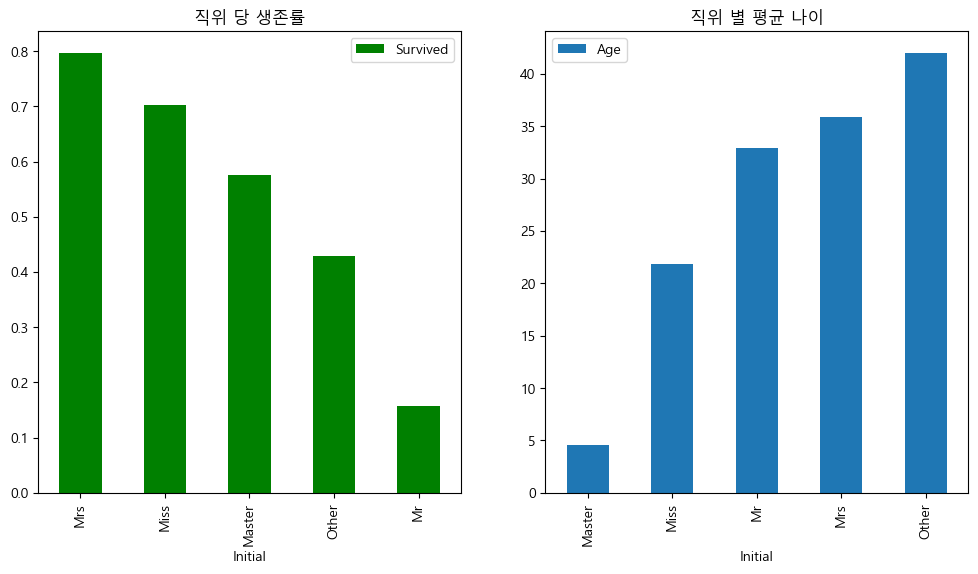

In [63]:
f,a = plt.subplots(1,2,figsize = (12,6))
df[['Survived','Initial']].groupby('Initial').mean().sort_values(by = 'Survived',ascending=False).plot.bar(ax = a[0],color = 'green')
df[['Age','Initial']].groupby('Initial').mean().plot.bar(ax = a[1])
a[0].set_title('직위 당 생존률')
a[1].set_title('직위 별 평균 나이');


In [64]:
Aged = df[['Age','Initial']].groupby('Initial').mean().to_dict()['Age']
Aged

{'Master': 4.574166666666667,
 'Miss': 21.845637583892618,
 'Mr': 32.89199029126213,
 'Mrs': 35.873873873873876,
 'Other': 42.0}

In [65]:
df_test.isnull().sum()

Pclass          0
Sex             0
Age            86
Ticket          0
Fare            0
Cabin           0
Embarked        0
Initial         0
FamillySize     0
dtype: int64

In [66]:
df.loc[df['Age'].isnull(),'Age'] = df.loc[df['Age'].isnull(),'Initial'].map(Aged)

In [67]:
df_test.loc[df_test['Age'].isnull(),'Age'] = df_test.loc[df_test['Age'].isnull(),'Initial'].map(Aged)

In [68]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       2
FamillySize    0
Initial        0
dtype: int64

# Embarked 최빈값 대치

In [69]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamillySize,Initial
61,1,1,1,38.0,113572,80.0,B,NaN,1,Miss
829,1,1,1,62.0,113572,80.0,B,NaN,1,Mrs


In [70]:
df.loc[df['Embarked'].isnull(),'Embarked'] = df['Embarked'].mode()[0]

In [71]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamillySize    0
Initial        0
dtype: int64

In [72]:
del df['Ticket']
del df_test['Ticket']

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Cabin        891 non-null    object 
 6   Embarked     891 non-null    object 
 7   FamillySize  891 non-null    int64  
 8   Initial      891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [74]:
# 인코딩 전 데이터 저장
df2 = df
df_test2  = df_test

# 범주형 변수(Initial , Embarked) -> 명목변수 인코딩

In [75]:
df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [76]:
df_test['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [77]:
dIni = {
    'Mr': 0,
    'Miss':1,
    'Mrs':2,
    'Master':3,
    'Other':4
}
df['Initial'] = df['Initial'].map(dIni)
df_test['Initial'] =df_test['Initial'].map(dIni)

In [78]:
dEmb = { v:i for i,v in enumerate(df['Embarked'].unique())}
df['Embarked'] = df["Embarked"].map(dEmb)
df_test['Embarked'] = df_test["Embarked"].map(dEmb)

In [79]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'FamillySize', 'Initial'],
      dtype='object')

c:\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


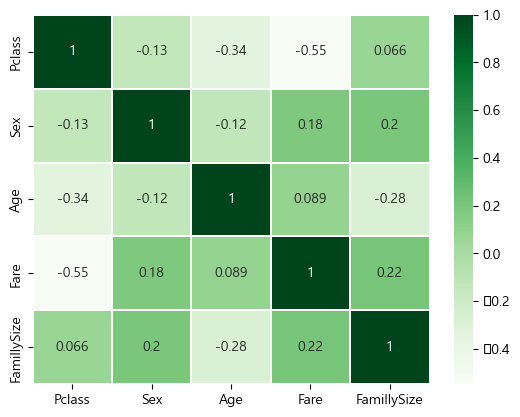

In [80]:
hmdata = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamillySize']]
sns.heatmap(hmdata.astype(np.float64).corr(),linewidths= 0.1
            ,annot=True,cmap= 'Greens'
            );

In [81]:
dfem_train = pd.get_dummies(df['Embarked'],prefix= "Embarked" , dtype = int)
dfem_test = pd.get_dummies(df_test['Embarked'],prefix= "Embarked" , dtype = int)
df = pd.concat([df,dfem_train], axis= 1)
df_test = pd.concat([df_test,dfem_test], axis= 1)

In [82]:
dfem_train = pd.get_dummies(df['Initial'],prefix= "Initial" , dtype = int)
dfem_test = pd.get_dummies(df_test['Initial'],prefix= "Initial" , dtype = int)
df = pd.concat([df,dfem_train], axis= 1)
df_test = pd.concat([df_test,dfem_test], axis= 1)

In [83]:
dfca_train = pd.get_dummies(df['Cabin'],prefix= "Cabin" , dtype = int)
dfca_test = pd.get_dummies(df_test['Cabin'],prefix= "Cabin" , dtype = int)
df = pd.concat([df,dfca_train], axis= 1)
df_test = pd.concat([df_test,dfca_test], axis= 1)

In [84]:
df.drop(['Initial','Embarked','Cabin'],axis = 1,inplace = True)
df_test.drop(['Initial','Embarked','Cabin'], axis = 1,inplace = True)

In [85]:
print(df.shape)
print(df_test.shape)

(891, 23)
(417, 21)


In [86]:
s_df = set(df.columns)
s_test = set(df_test.columns)
print(s_df ^ s_test)

{'Cabin_T', 'Survived'}


In [87]:
df_test['Cabin_T'] = 0

# 모델 학습

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [89]:
train_input = df.drop(['Survived'], axis = 1)
train_target = df['Survived']
test_input = df_test

In [90]:
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size = 0.3 ,  random_state= 42)

In [91]:
model = RandomForestClassifier(n_estimators= 1000)
f = model.fit(train_input,train_target) 

In [92]:
print(model.score(train_input,train_target))
print(model.score(val_input,val_target))

0.9823434991974318
0.8022388059701493


In [93]:
i = model.feature_importances_

In [94]:
c = train_input.columns


<Axes: >

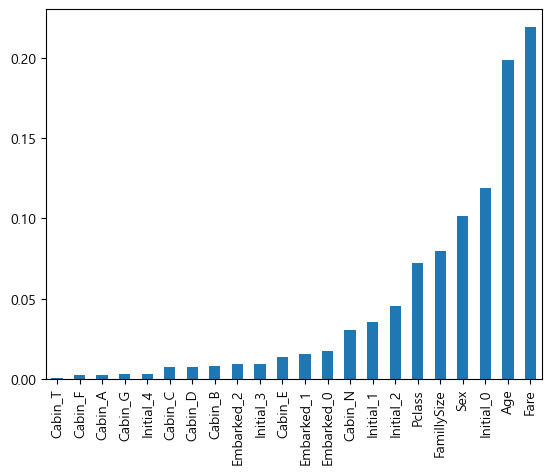

In [95]:
pd.Series(i,index = c).sort_values().plot.bar()

In [96]:
df['Fare'] = df['Fare'].replace(0, 1)
df['Fare'] = np.log(df['Fare'])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   FamillySize  891 non-null    int64  
 6   Embarked_0   891 non-null    int32  
 7   Embarked_1   891 non-null    int32  
 8   Embarked_2   891 non-null    int32  
 9   Initial_0    891 non-null    int32  
 10  Initial_1    891 non-null    int32  
 11  Initial_2    891 non-null    int32  
 12  Initial_3    891 non-null    int32  
 13  Initial_4    891 non-null    int32  
 14  Cabin_A      891 non-null    int32  
 15  Cabin_B      891 non-null    int32  
 16  Cabin_C      891 non-null    int32  
 17  Cabin_D      891 non-null    int32  
 18  Cabin_E      891 non-null    int32  
 19  Cabin_F 

In [98]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamillySize,Initial
0,0,3,0,22.0,7.2500,N,0,2,0
1,1,1,1,38.0,71.2833,C,1,2,2
2,1,3,1,26.0,7.9250,N,0,1,1
3,1,1,1,35.0,53.1000,C,0,2,2
4,0,3,0,35.0,8.0500,N,0,1,0


In [99]:
df_test2.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,FamillySize
0,3,0,34.5,7.8292,N,2,0,1
1,3,1,47.0,7.0000,N,0,2,2
2,2,0,62.0,9.6875,N,2,0,1
3,3,0,27.0,8.6625,N,0,0,1
4,3,1,22.0,12.2875,N,0,2,3


In [100]:
df2['Cabin'].value_counts().sort_index().index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T'], dtype='object', name='Cabin')

In [101]:
# 사전 구축
dC  = { k : v for k,v in zip(df2['Cabin'].value_counts().sort_index().index,range(9))}
dC

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'N': 7, 'T': 8}

In [102]:
df2['Cabin'] = df2['Cabin'].map(dC)

In [103]:
df_test2['Cabin'].value_counts().index
#T의 부재

Index(['N', 'C', 'B', 'D', 'E', 'F', 'A', 'G'], dtype='object', name='Cabin')

In [104]:
df_test2['Cabin'] = df_test2['Cabin'].map(dC)

In [105]:
df_test2['Cabin'].value_counts()

Cabin
7    326
2     35
1     18
3     13
4      9
5      8
0      7
6      1
Name: count, dtype: int64

# Embarked,Initial,Cabin -> 바이너리 인코딩 수행

In [106]:
#Cabin 바이너리 인코딩
max_bits = len(format(max(dC.values()),'b'))
for i in range(max_bits):
    df2[f'Cabin {i}'] =df2['Cabin'].map(lambda x : (x >> i) & 1 )
df2 = df2.drop('Cabin' , axis= 1 )

for i in range(max_bits):
    df_test2[f'Cabin {i}'] =df_test2['Cabin'].map(lambda x : (x >> i) & 1 )
df_test2 = df_test2.drop('Cabin' , axis= 1 )

In [107]:
#Initial 바이너리 인코딩
max_bits = len(format(df2['Initial'].max(),'b'))
for i in range(max_bits):
    df2[f'Initial {i}'] =df2['Initial'].map(lambda x : (x >> i) & 1 )
df2 = df2.drop('Initial' , axis= 1 )

for i in range(max_bits):
    df_test2[f'Initial {i}'] =df_test2['Initial'].map(lambda x : (x >> i) & 1 )
df_test2 = df_test2.drop('Initial' , axis= 1 )

In [108]:
#Embarked 바이너리 인코딩
max_bits = len(format(df2['Embarked'].max(),'b'))
for i in range(max_bits):
    df2[f'Embarked {i}'] =df2['Embarked'].map(lambda x : (x >> i) & 1 )
df2 = df2.drop('Embarked' , axis= 1 )

for i in range(max_bits):
    df_test2[f'Embarked {i}'] =df_test2['Embarked'].map(lambda x : (x >> i) & 1 )
df_test2 = df_test2.drop('Embarked' , axis= 1 )

In [109]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,FamillySize,Cabin 0,Cabin 1,Cabin 2,Cabin 3,Initial 0,Initial 1,Initial 2,Embarked 0,Embarked 1
0,0,3,0,22.0,7.2500,2,1,1,1,0,0,0,0,0,0
1,1,1,1,38.0,71.2833,2,0,1,0,0,0,1,0,1,0
2,1,3,1,26.0,7.9250,1,1,1,1,0,1,0,0,0,0
3,1,1,1,35.0,53.1000,2,0,1,0,0,0,1,0,0,0
4,0,3,0,35.0,8.0500,1,1,1,1,0,0,0,0,0,0


In [110]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,FamillySize,Cabin 0,Cabin 1,Cabin 2,Cabin 3,Initial 0,Initial 1,Initial 2,Embarked 0,Embarked 1
0,0,3,0,22.0,7.2500,2,1,1,1,0,0,0,0,0,0
1,1,1,1,38.0,71.2833,2,0,1,0,0,0,1,0,1,0
2,1,3,1,26.0,7.9250,1,1,1,1,0,1,0,0,0,0
3,1,1,1,35.0,53.1000,2,0,1,0,0,0,1,0,0,0
4,0,3,0,35.0,8.0500,1,1,1,1,0,0,0,0,0,0


In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   FamillySize  891 non-null    int64  
 6   Cabin 0      891 non-null    int64  
 7   Cabin 1      891 non-null    int64  
 8   Cabin 2      891 non-null    int64  
 9   Cabin 3      891 non-null    int64  
 10  Initial 0    891 non-null    int64  
 11  Initial 1    891 non-null    int64  
 12  Initial 2    891 non-null    int64  
 13  Embarked 0   891 non-null    int64  
 14  Embarked 1   891 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 104.5 KB


In [112]:
df2['Fare'] = np.log(df2['Fare'].replace(0,1))

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [114]:
train_input2 = df2.drop('Survived',axis = 1)
train_target2 = df['Survived']
train_input2,val_input2,train_target2,val_target2 = train_test_split(train_input2,train_target2,test_size = 0.3 ,  random_state= 42)

In [143]:
model2 = RandomForestClassifier(oob_score= True )
model2.fit(train_input2,train_target2)
print(model2.score(train_input2,train_target2))
print(model2.score(val_input2,val_target2))

0.9823434991974318
0.7985074626865671


In [151]:
print(model2.predict(val_input2[:5]))
print(val_target2[:5])

[1 0 0 1 0]
709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64


In [147]:
df_test2.iloc[0]

Pclass          3.0000
Sex             0.0000
Age            34.5000
Fare            7.8292
FamillySize     1.0000
Cabin 0         1.0000
Cabin 1         1.0000
Cabin 2         1.0000
Cabin 3         0.0000
Initial 0       0.0000
Initial 1       0.0000
Initial 2       0.0000
Embarked 0      0.0000
Embarked 1      1.0000
Name: 0, dtype: float64

In [155]:
model2.predict_proba(val_input2[:5])

array([[0.09 , 0.91 ],
       [0.89 , 0.11 ],
       [0.882, 0.118],
       [0.01 , 0.99 ],
       [0.62 , 0.38 ]])

<Axes: xlabel='FamillySize'>

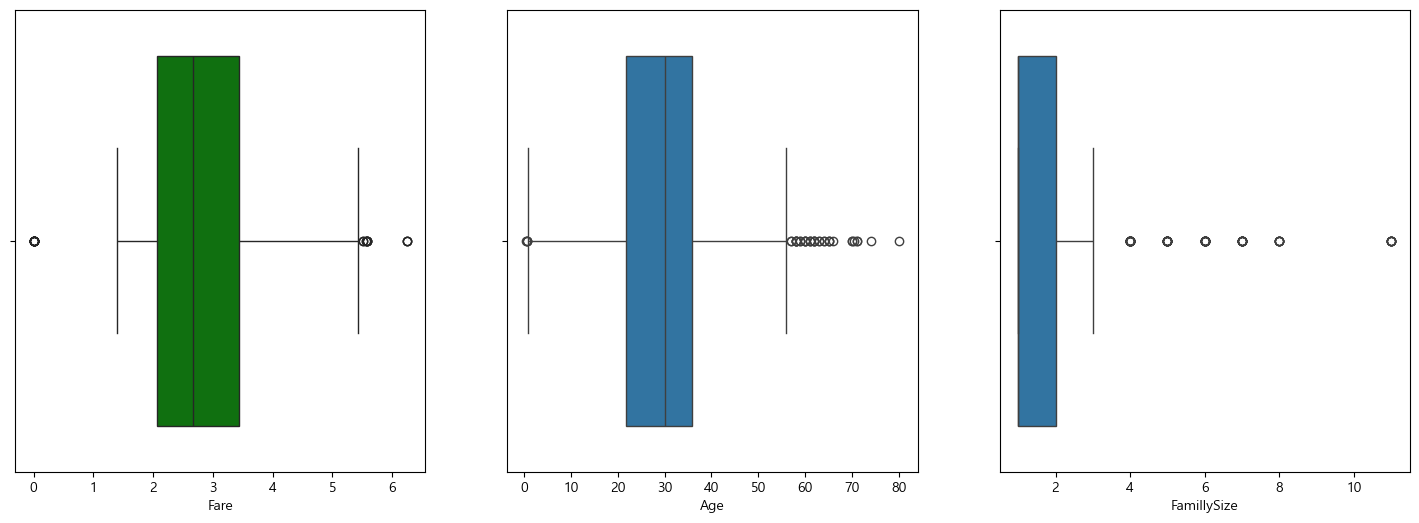

In [175]:
# 이상치 찾기
f,a = plt.subplots(1,3,figsize= (18,6))
sns.boxplot(data= df2, x = "Fare", ax = a[0],color= 'g')
sns.boxplot(data= df2, x = "Age", ax = a[1],fill = True)
sns.boxplot(data= df2, x = "FamillySize", ax = a[2])



In [180]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
train_input2_scale = rs.fit_transform(train_input2)
val_input2_scale = rs.fit_transform(val_input2)

In [116]:
from xgboost  import XGBClassifier
xg = XGBClassifier()
xg.fit(train_input2,train_target2)
print(xg.score(train_input2,train_target2))
print(xg.score(val_input2,val_target2))

0.9759229534510433
0.8022388059701493


In [181]:
from xgboost  import XGBClassifier
xg = XGBClassifier()
xg.fit(train_input2_scale,train_target2)
print(xg.score(train_input2_scale,train_target2))
print(xg.score(val_input2_scale,val_target2))

0.9759229534510433
0.7910447761194029


In [182]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_input2_scale,train_target)
print(knn.score(train_input2_scale,train_target2))
print(knn.score(val_input2_scale,val_target2))

0.8587479935794543
0.7947761194029851
